In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:09<00:00, 329MB/s]
100% 1.06G/1.06G [00:09<00:00, 118MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
# generators -- divides whole data into batches and that batch gets loaded into RAM one at a time
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize

def preprocess(image,label): # to get all pixel values from 0 to 1
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(preprocess)
validation_ds = validation_ds.map(preprocess)


In [ ]:
# create CNN Model
model = keras.models.Sequential()

#layer1
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(256,256,3)))
model.add(keras.layers.MaxPooling2D(strides=2, pool_size=(2,2)))

#layer2
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D(strides=2, pool_size=(2,2)))

#layer3
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D(strides=2, pool_size=(2,2)))

#Flatten
model.add(keras.layers.Flatten())

# FC Layer
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 69ms/step - accuracy: 0.6066 - loss: 0.6909 - val_accuracy: 0.7466 - val_loss: 0.5165
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.7427 - loss: 0.5185 - val_accuracy: 0.7894 - val_loss: 0.4511
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.8153 - loss: 0.4001 - val_accuracy: 0.7872 - val_loss: 0.4833
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 74ms/step - accuracy: 0.8758 - loss: 0.2840 - val_accuracy: 0.8044 - val_loss: 0.5350
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 66ms/step - accuracy: 0.9279 - loss: 0.1712 - val_accuracy: 0.7892 - val_loss: 0.7116
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9622 - loss: 0.0997 - val_accuracy: 0.7830 - val_loss: 0.9107
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.9768 - loss: 0.0630 - val_accuracy: 0.7852 - val_loss: 1.0495
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.9829 - loss: 0.0485 - 

In [ ]:
import matplotlib.pyplot as plt

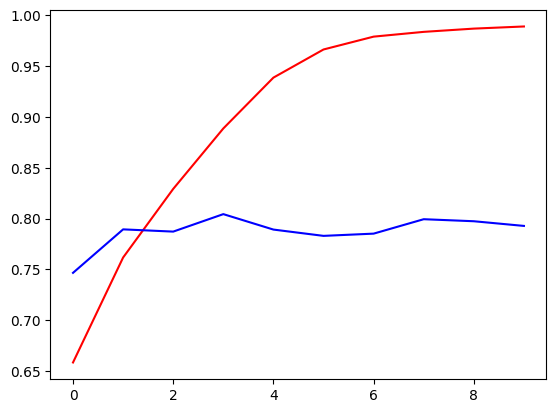

In [ ]:
plt.plot(history.history['accuracy'], "r")
plt.plot(history.history['val_accuracy'], "b")


Clear Case of Overfitting

In [ ]:
# create CNN Model (with Dropout and Batch Norm)
model = keras.models.Sequential()

#layer1
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(256,256,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(strides=2, pool_size=(2,2)))

#layer2
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(strides=2, pool_size=(2,2)))

#layer3
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(strides=2, pool_size=(2,2)))

#Flatten
model.add(keras.layers.Flatten())

# FC Layer
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(1, activation="sigmoid"))


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 83ms/step - accuracy: 0.5444 - loss: 3.1037 - val_accuracy: 0.6166 - val_loss: 0.6494
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 77ms/step - accuracy: 0.6104 - loss: 0.6652 - val_accuracy: 0.6750 - val_loss: 0.5880
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.7014 - loss: 0.5755 - val_accuracy: 0.6400 - val_loss: 0.6448
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7288 - loss: 0.5504 - val_accuracy: 0.7408 - val_loss: 0.5141
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.7852 - loss: 0.4678 - val_accuracy: 0.6608 - val_loss: 0.7893
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8126 - loss: 0.4151 - val_accuracy: 0.7488 - val_loss: 1.1967
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.8336 - loss: 0.3638 - val_accuracy: 0.8026 - val_loss: 0.4730
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 82ms/step - accuracy: 0.8754 - loss: 0.3035 - 

In [ ]:
# DATA AUGMENTATION
model.save_weights("model-dropou-batchnorm.weights.h5")

In [ ]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image_dataset_from_directory

In [ ]:
batch_size = 16

# data augmentation for trainning data (rescaling and other augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# only rescaling test data
test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    "/content/train",
    target_size=(150,150),
    batch_size=batch_size,
    class_mode="binary"
)

validation_generator = train_datagen.flow_from_directory(
    "/content/test",
    target_size=(150,150),
    batch_size=batch_size,
    class_mode="binary"
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import